In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [5]:
train = datasets.MNIST(root = "./dataset", train=True, transform=transforms.ToTensor(), download=True)
test = datasets.MNIST(root = "./dataset", train=False, transform=transforms.ToTensor(), download=True)

data = DataLoader(train, batch_size=100, shuffle=True) 

t_size = max(train.targets) + 1
print("라벨 종류 : {}".format(t_size))

라벨 종류 : 10


In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
e = 0

F = nn.Sequential(
    nn.Linear(28*28, 128, device = device),
    nn.ReLU(),
    nn.Linear(128,64, device = device),
    nn.ReLU(),
    nn.Linear(64,10, device = device),
    nn.Sigmoid()
)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(F.parameters(), lr = 0.1)
epoch = 30

for e in range(epoch) :
    loss_sum = 0
    for x, t in data :
        #y = F(x)
        x = x.reshape(x.shape[0],28*28).to(device)
        y = F(x)
        #손실함수
        loss = loss_function(y, t)
        loss_sum += loss
        #최적화함수
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"epoch {e+1} | loss {loss_sum / len(data)}")


epoch 1 | loss 1.9856339693069458
epoch 2 | loss 1.6461750268936157
epoch 3 | loss 1.596909761428833
epoch 4 | loss 1.5776176452636719
epoch 5 | loss 1.566611409187317
epoch 6 | loss 1.5585529804229736
epoch 7 | loss 1.55216383934021
epoch 8 | loss 1.5468662977218628
epoch 9 | loss 1.5423378944396973
epoch 10 | loss 1.5383586883544922
epoch 11 | loss 1.5348455905914307
epoch 12 | loss 1.5311952829360962
epoch 13 | loss 1.525437355041504
epoch 14 | loss 1.5202072858810425
epoch 15 | loss 1.5167875289916992
epoch 16 | loss 1.5141109228134155
epoch 17 | loss 1.511757493019104
epoch 18 | loss 1.5096365213394165
epoch 19 | loss 1.5077658891677856
epoch 20 | loss 1.5061326026916504
epoch 21 | loss 1.5045299530029297
epoch 22 | loss 1.5030661821365356
epoch 23 | loss 1.501726746559143
epoch 24 | loss 1.500425934791565
epoch 25 | loss 1.499299168586731
epoch 26 | loss 1.4981987476348877
epoch 27 | loss 1.4971622228622437
epoch 28 | loss 1.496167540550232
epoch 29 | loss 1.4952590465545654
epoc

In [12]:
cnt = 0;
err = []

for i in range(len(test)) :
    x = test[i][0].reshape(28*28).to(device)
    t = test[i][1]
    y = F(x)
    if torch.argmax(y) == t :
        cnt = cnt + 1
    else :
        err.append(i)

print("correct_posibility : %f" %(cnt / len(test)))
print(err)
torch.save(F,"MNIST.pt")

correct_posibility : 0.960400
[8, 33, 124, 149, 151, 241, 247, 259, 313, 320, 321, 340, 352, 445, 448, 479, 495, 507, 543, 551, 565, 578, 582, 591, 610, 619, 659, 684, 691, 707, 717, 720, 740, 810, 844, 881, 882, 924, 938, 939, 947, 950, 956, 959, 965, 1014, 1039, 1044, 1107, 1112, 1114, 1156, 1181, 1182, 1192, 1194, 1204, 1226, 1232, 1242, 1247, 1256, 1260, 1283, 1289, 1299, 1319, 1326, 1328, 1364, 1378, 1393, 1414, 1433, 1440, 1444, 1467, 1469, 1494, 1500, 1522, 1527, 1530, 1549, 1553, 1587, 1609, 1621, 1626, 1634, 1671, 1678, 1681, 1709, 1717, 1751, 1754, 1772, 1790, 1800, 1857, 1878, 1901, 1938, 1940, 1941, 1952, 1984, 2016, 2024, 2035, 2040, 2043, 2044, 2053, 2070, 2098, 2109, 2118, 2129, 2130, 2135, 2174, 2182, 2185, 2186, 2189, 2224, 2266, 2272, 2293, 2299, 2318, 2325, 2369, 2371, 2387, 2394, 2406, 2414, 2422, 2433, 2488, 2548, 2598, 2607, 2610, 2631, 2648, 2654, 2695, 2730, 2760, 2771, 2863, 2896, 2907, 2925, 2927, 2939, 2945, 2953, 2995, 3005, 3030, 3060, 3073, 3117, 3130, 314

AI의 제안 : 7
정답 : 9


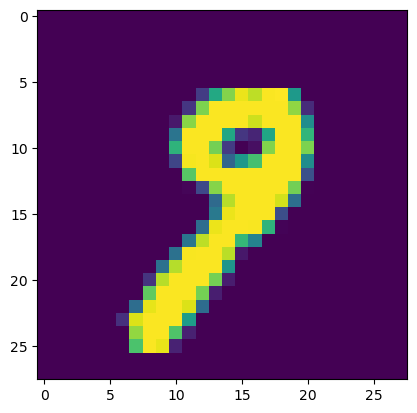

In [10]:
#F = torch.load("MNIST.pt", weights_only = False)
a = 73

img = test[a][0].reshape(28,28)
plt.imshow(img)

y_array = F(img.reshape(1,28*28))
print(f"AI의 제안 : {torch.argmax(y_array)}")
print(f"정답 : {test[a][1]}")